


# Análise de dados para Pesquisa de Mercado!

# Introdução

Esse projeto explorará uma base de dados de estabelecimentos comerciais em Los Angeles e tem como objetivo principal analisar esses dados para que sejam criadas recomendações sobre o tipo mais apropriado de restaurante e o número de assentos. Além de comentar sobre a possibilidade de desenvolver uma rede de restaurantes.


## Dicionário de dados

Há um DataFrame que iremos trabalhar:

- `rest_data` (dados sobre estabelecimentos comerciais):
    - `'object_name'`: nome de estabelecimento
    - `'chain'`:  estabelecimento de rede (TRUE/FALSE)
    - `'object_type'`: tipo de estabelecimento
    - `'address'`: endereço
    - `'number'`: número de assentos

## Importando as Bibliotecas:

In [1]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt

## Etapa 1. Carregando os dados:

In [2]:
df_firms = pd.read_csv('rest_data_us_upd.csv')

### DataFrame `Firms`

In [3]:
df_firms.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [4]:
df_firms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


## Etapa 2. Preparação de dados

-	Verificação e correção os tipos de dados


## Corrigindo os dados:

**Removendo dados duplicados e conferindo dados ausentes no DataFrame:**

In [5]:
df_firms.drop_duplicates(inplace=True)
print('o número de dados duplicados no Dataframe é de:', df_firms.duplicated().sum())
print()
print('o número de dados ausentes no Dataframe é de:', df_firms.isna().sum())

o número de dados duplicados no Dataframe é de: 0

o número de dados ausentes no Dataframe é de: id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64


<span style="color:green;">Como podemos notar, os dados duplicados foram removidos e há 3 linhas com dados ausentes na coluna ``Chain``, porém como são somentes dados True e False não preencherei esses dados.</span>

**Modificando os títulos da colunas:**

In [6]:
df_firms = df_firms.rename(columns = {'object_name': 'business_name', 'object_type': 'business_type', 'number' : 'n_seats'})

## Etapa 3. Análise Exploratória de Dados (EAD)

In [7]:
df_firms.head()

,id,business_name,address,chain,business_type,n_seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


**Agrupando os dados de ``Tipo de Negócio``:**

In [8]:
business_count = df_firms.groupby('business_type').agg({'business_type' : 'count'})
business_count['Total %'] = (business_count / business_count.sum()) * 100
business_count = business_count.sort_values(by='Total %', ascending=False)
business_count

,business_type,Total %
business_type,,
Restaurant,7255,75.173557
Fast Food,1066,11.045488
Cafe,435,4.507305
Pizza,320,3.315719
Bar,292,3.025593
Bakery,283,2.932339


**Plotando os dados em um ``Gráfico de Barras``:**

<Figure size 1200x800 with 0 Axes>

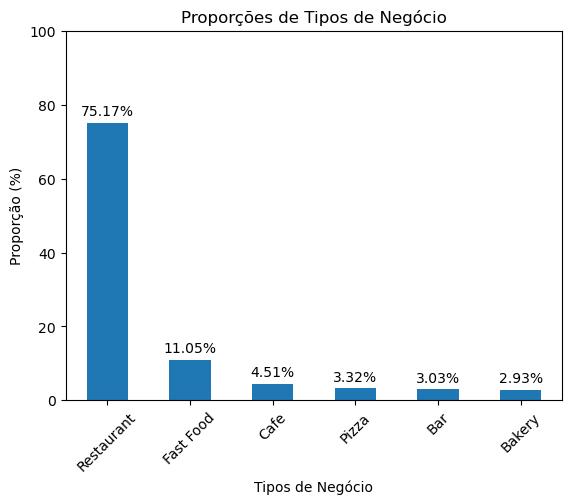

In [9]:
plt.figure(figsize=(12, 8))
ax = business_count.plot(kind='bar', x='business_type', y='Total %', legend=False)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{val:.2f}%' for val in business_count['Total %']], label_type='edge', padding=3)
plt.title('Proporções de Tipos de Negócio')
plt.xlabel('Tipos de Negócio')
plt.ylabel('Proporção (%)')
ax.set_xticklabels(business_count.index)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show();

<span style="color:green;">Como podemos observar na tabela acima, ``75%`` dos estabelecimentos da análise são ``restaurantes`` e em segundo lugar temos ``Fast Food`` com ``11%``, mostrando assim uma predominância desses dois segmentos.</span>

**Separando os dados por ``Rede`` e ``Não Rede``:**

In [10]:
business_chain = df_firms['chain'].value_counts(normalize=True) * 100
business_chain.index = business_chain.index.map({False: 'Não Rede', True: 'Rede'})
business_chain.reset_index()

,chain,proportion
0,Não Rede,61.898839
1,Rede,38.101161


**Plotando os dados em um ``Gráfico de Barras``:**

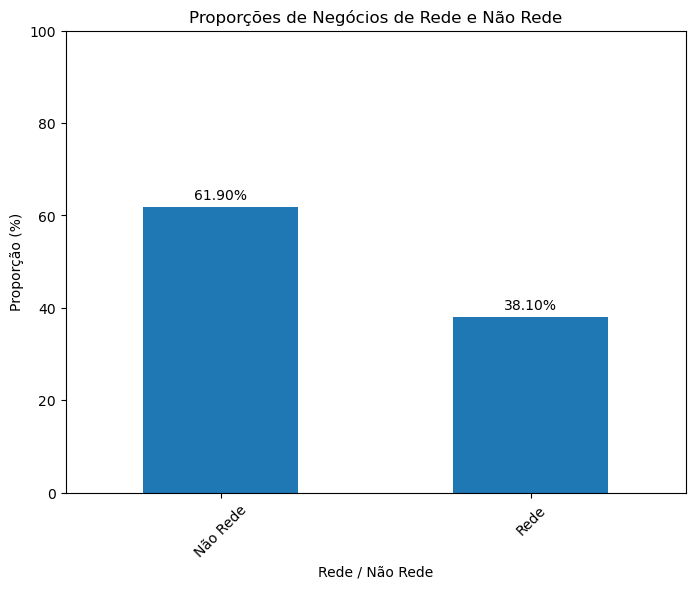

In [11]:
plt.figure(figsize=(8, 6))
ax = business_chain.plot(kind='bar', legend=False)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{val:.2f}%' for val in business_chain], label_type='edge', padding=3)
plt.title('Proporções de Negócios de Rede e Não Rede')
plt.xlabel('Rede / Não Rede')
plt.ylabel('Proporção (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show();

<span style="color:green;">Como podemos notar no gráfico acima, ``61,90%`` dos estabelecimentos não pertencem a uma rede e ``38,10%`` pertencem.</span>

**Agrupando os dados por ``Tipo de Negócio`` e ``Rede/Não Rede``:**

In [12]:
group_chain = df_firms.groupby('chain')['business_type'].value_counts()
group_b_chain = group_chain.reset_index(name='count')
group_b_chain

,chain,business_type,count
0,False,Restaurant,4961
1,False,Fast Food,461
2,False,Bar,215
3,False,Cafe,169
4,False,Pizza,166
5,True,Restaurant,2292
6,True,Fast Food,605
7,True,Bakery,283
8,True,Cafe,266
9,True,Pizza,153


**Plotando os dados em um ``Gráfico de Barras horizontal``:**

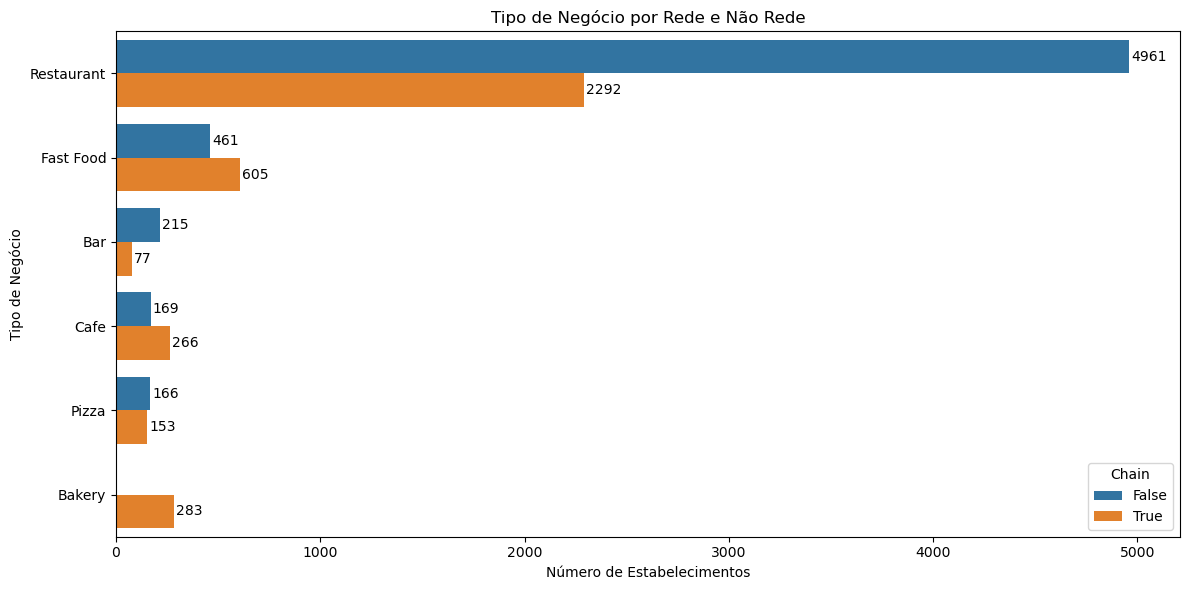

In [13]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(y='business_type', x='count', hue='chain', data=group_b_chain)
for p in barplot.patches:
    width = p.get_width()
    if width > 0:
        plt.text(width + 10, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center')
plt.title('Tipo de Negócio por Rede e Não Rede')
plt.xlabel('Número de Estabelecimentos')
plt.ylabel('Tipo de Negócio')
plt.legend(title='Chain')
plt.tight_layout()
plt.show()

<span style="color:green;">Como podemos observar no gráfico acima, a maioria dos ``Restaurantes`` não são de rede, mas por outro lado, a maioria dos estabelecimentos ``Fast Food`` são de rede. Um dado interessante no gráfico acima é a ``Bakery`` que ``100%`` são de redes.</span>

**Agrupando os dados ``Rede/Não Rede``, ``Tipo de Negócio`` e ``Número de assentos``:**

In [14]:
group_n_seats = df_firms.groupby(['chain', 'business_type']).agg({'n_seats' : 'mean'}).reset_index()
group_n_seats

,chain,business_type,n_seats
0,False,Bar,46.381395
1,False,Cafe,23.556213
2,False,Fast Food,23.633406
3,False,Pizza,31.325301
4,False,Restaurant,49.523886
5,True,Bakery,21.773852
6,True,Bar,40.259740
7,True,Cafe,25.917293
8,True,Fast Food,38.089256
9,True,Pizza,25.529412


**Plotando os dados em um ``Gráfico de Barras horizontal``:**

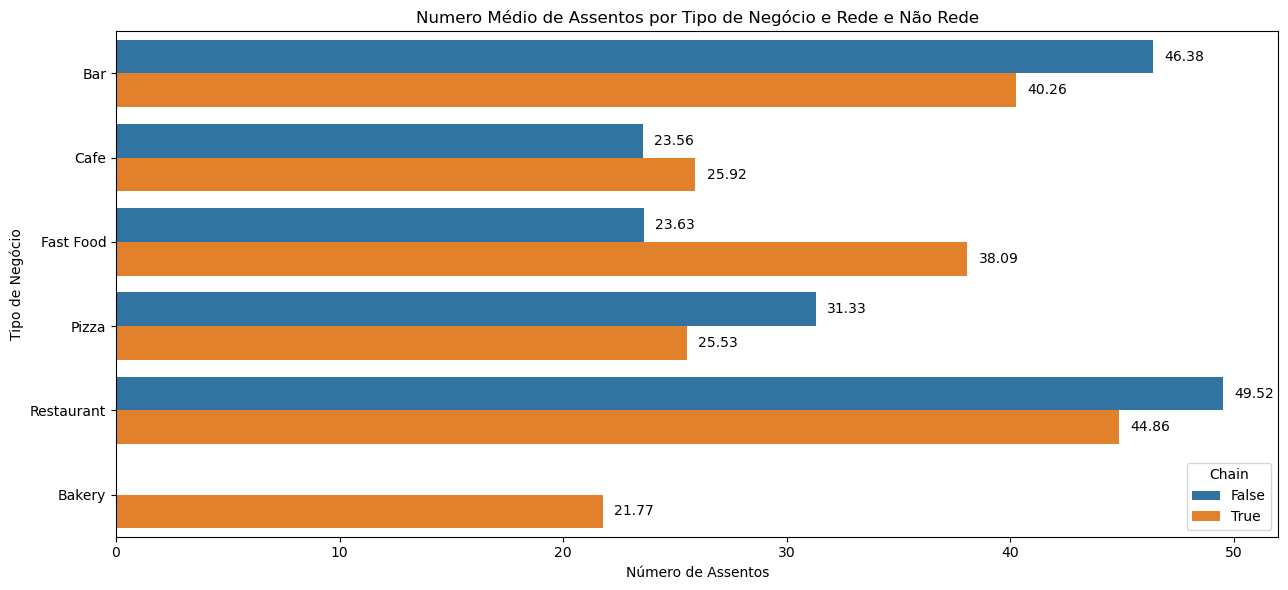

In [15]:
plt.figure(figsize=(13, 6))
barplot = sns.barplot(y='business_type', x='n_seats', hue='chain', data=group_n_seats)
for p in barplot.patches:
    width = p.get_width()
    if width > 0:
        plt.text(width + 0.5, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center')
plt.title('Numero Médio de Assentos por Tipo de Negócio e Rede e Não Rede')
plt.xlabel('Número de Assentos')
plt.ylabel('Tipo de Negócio')
plt.legend(title='Chain')
plt.legend(title='Chain', loc='lower right')
plt.tight_layout()
plt.show()

<span style="color:green;">Como podemos notar no gráfico acima, um dado interessante é a diferença do número médio de assentos nos ``Fast Foods`` de ``Rede`` e ``Não Rede``, mostrando que as Redes investem em um maior número de assentos, uma vez que a Rede tem um maior ``poder de Marketing`` e ``conhecimento da marca`` por parte dos consumidores e assim eles conseguem angariar mais pessoas para o estabelecimento.</span>

**Agrupando os dados ``Rede/Não Rede``, ``Tipo de Negócio`` e ``Número de Assentos``:**

In [16]:
business_seats = df_firms.groupby('business_type')['n_seats'].mean().reset_index()
business_seats = business_seats.sort_values(by='n_seats', ascending=False)
business_seats

,business_type,n_seats
5,Restaurant,48.042316
1,Bar,44.767123
3,Fast Food,31.837711
4,Pizza,28.459375
2,Cafe,25.000000
0,Bakery,21.773852


**Plotando os dados em um ``Gráfico de Barras``:**

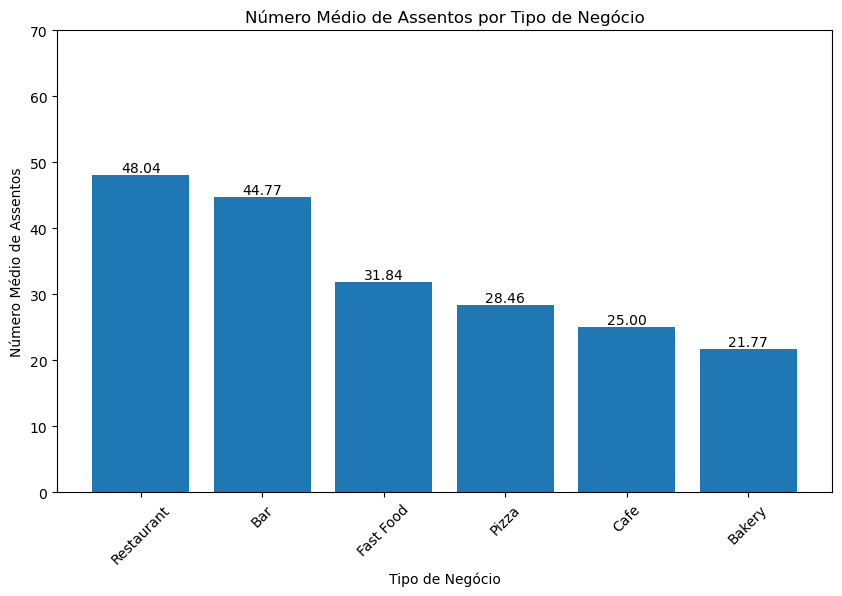

In [17]:
plt.figure(figsize=(10, 6))
bars = plt.bar(business_seats['business_type'], business_seats['n_seats'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')
plt.title('Número Médio de Assentos por Tipo de Negócio')
plt.xlabel('Tipo de Negócio')
plt.ylabel('Número Médio de Assentos')
plt.xticks(rotation=45)
plt.ylim(0, 70)
plt.show()

<span style="color:green;">Como podemos observar no gráfico acima, o maior ``Número médio de Assentos`` se encontram nos ``Restaurantes`` , seguido dos ``Bares`` e ``Fast Food``, uma vez que as pessoas geralmente permanecem dentro destes estabelecimentos para consumir as bebidas e alimentos sentados.</span>

**Extraindo os nomes das ruas da coluna ``Address`` e transferindo esses dados para a nova coluna ``street_name``:**

In [18]:
def extract_street(address):
    split_parts = address.split()
    return ' '.join(split_parts[1:])
df_firms['street_name'] = df_firms['address'].apply(extract_street)
df_firms

,id,business_name,address,chain,business_type,n_seats,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE 100


**Agrupando os dados por ``Rua`` e ``Número de Estabelecimentos``:**

In [19]:
group_rest_10 = df_firms.groupby('street_name').agg(n_business=('business_type', 'count')).sort_values(by='n_business', ascending=False).reset_index().head(10)
group_rest_10

,street_name,n_business
0,W SUNSET BLVD,296
1,W PICO BLVD,288
2,HOLLYWOOD BLVD,167
3,WILSHIRE BLVD,161
4,S VERMONT AVE,148
5,SANTA MONICA BLVD,146
6,W 3RD ST,145
7,BEVERLY BLVD,135
8,S FIGUEROA ST,134
9,MELROSE AVE,128


**Plotando os dados em um ``Gráfico de Barras``:**

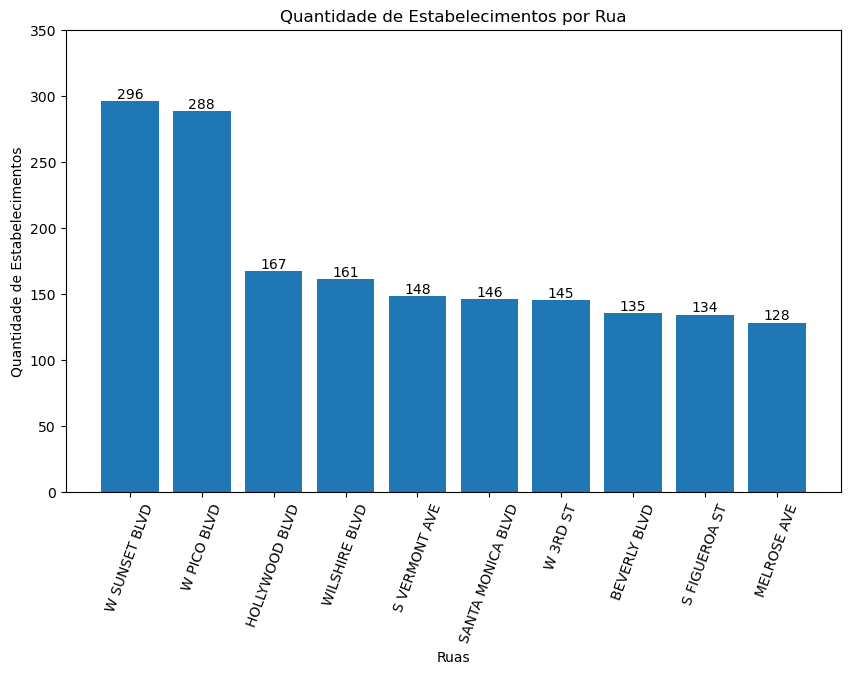

In [20]:
plt.figure(figsize=(10, 6))
bars = plt.bar(group_rest_10['street_name'], group_rest_10['n_business'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')
plt.title('Quantidade de Estabelecimentos por Rua')
plt.xlabel('Ruas')
plt.ylabel('Quantidade de Estabelecimentos')
plt.xticks(rotation=70)
plt.ylim(0, 350)
plt.show()

<span style="color:green;">Como podemos notar no gráfico acima, temos destaque das ruas ``W SUNSET BLVD`` e ``W PICO BLVD`` com ``296`` e ``288`` estabelecimentos respectivamente. As demais ruas possui um número semelhante.</span>

**Conferindo as ruas que possuem ``somente um`` Estabelecimento:**

In [21]:
group_rest = df_firms.groupby('street_name').agg(n_business=('business_type', 'count')).sort_values(by='n_business', ascending=False).reset_index()
group_rest_n1 = group_rest[group_rest['n_business'] == 1]
print("O número de Ruas com somente um Estabelecimento são um total de:", len(group_rest_n1))

O número de Ruas com somente um Estabelecimento são um total de: 2445


**Agrupando os dados das ``dez ruas`` com mais Estabelecimentos para verificar a ``Média de Assentos``:**

In [22]:
group_rest_10_seats = df_firms.groupby('street_name').agg(n_business=('business_type', 'count'), avg_seats=('n_seats', 'mean')).sort_values(
    by='n_business', ascending=False).reset_index().head(10)
group_rest_10_seats

,street_name,n_business,avg_seats
0,W SUNSET BLVD,296,50.918919
1,W PICO BLVD,288,40.878472
2,HOLLYWOOD BLVD,167,53.730539
3,WILSHIRE BLVD,161,62.130435
4,S VERMONT AVE,148,45.878378
5,SANTA MONICA BLVD,146,32.390411
6,W 3RD ST,145,43.931034
7,BEVERLY BLVD,135,44.770370
8,S FIGUEROA ST,134,50.761194
9,MELROSE AVE,128,52.429688


**Plotando os dados em um ``Gráfico de Linha duplo``:**

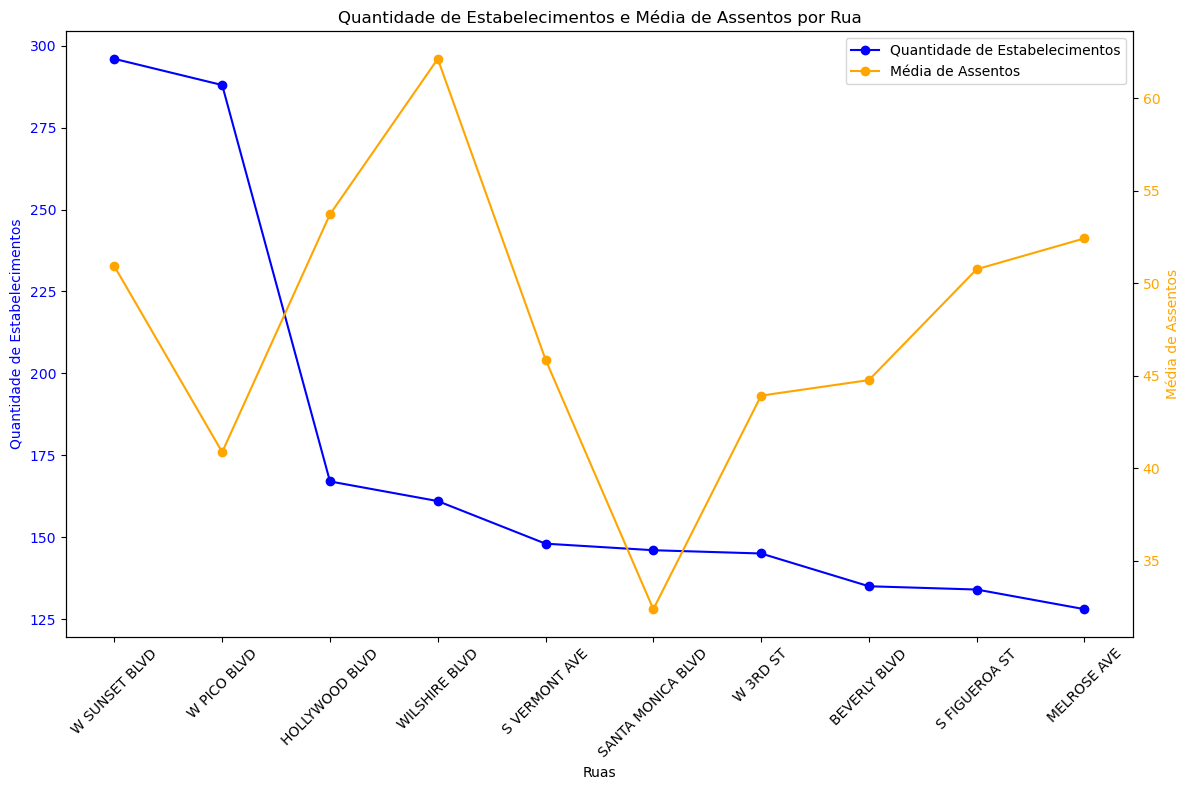

In [23]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.plot(group_rest_10_seats['street_name'], group_rest_10_seats['n_business'], color='blue', marker='o', label='Quantidade de Estabelecimentos')
ax1.set_xlabel('Ruas')
ax1.set_ylabel('Quantidade de Estabelecimentos', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(group_rest_10_seats['street_name'], group_rest_10_seats['avg_seats'], color='orange', marker='o', label='Média de Assentos')
ax2.set_ylabel('Média de Assentos', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Quantidade de Estabelecimentos e Média de Assentos por Rua')
ax1.set_xticks(range(len(group_rest_10_seats['street_name'])))
ax1.set_xticklabels(group_rest_10_seats['street_name'], rotation=45)
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show();

<span style="color:green;">Como podemos observar no gráfico acima, a rua ``W PICO BLVD`` apesar de possuir muitos ``Estabelecimentos`` possui uma média baixa de assentos em comparação com as demais ruas e provavelmente isso se deve ao fato da rua possuir um público jovem que não se interessam mais pelos alimentos e bebidas do que especificamente para os assentos. Outro caso interessante a se observar é a rua ``SANTA MONICA BLVD`` que possui a menor média de assentos de todas as ruas e que provavelmente também é frequentada por um público jovem.</span>

<span style="color:green;">Outra observação é que há uma ``Tendência`` para o aumento no número de assentos nas ruas que possuem ``menos`` de 200 estabelecimentos e para as ruas que possuem ``mais`` de 200 estabelecimentos, tende a diminuir o número de assentos.</span>

# Conclusão geral

- Para concluir, gostaria de fazer alguns apontamentos:
    - Pudemos notar que ``61,90%`` dos Estabelecimentos não são de Redes contra ``38,10%`` de Redes, mostrando que há muito empreendedores na cidade e também que ``há espaço para a criação de mais redes``
    - Outro fato que pode ajudar a entender o porquê da maioria dos estabelecimentos não serem de Redes é que ``75% da amostra`` da análise é composta por ``Restaurantes`` e estes geralmente não pertencem a grandes Redes, uma vez que na análise foi visto que ``mais da metade dos restaurantes`` da amostra não pertencem à redes.
    - O ``número de assentos médios`` são maiores em restaurantes e bares do que os demais estabelecimentos, uma vez que é onde as pessoas costumam passar mais tempo sentadas para consumir alimentos e bebidas
    - ``Duas ruas (W Sunset BLVD e W PICO BLVD)`` se destacam em relação ao número de restaurantes com quase o dobro que as demais ruas
    - Por fim, há uma ``tendência`` de que nas ruas com menos estabelecimentos haverão mais números de assentos e ao contrário para as ruas que tem mais estabelecimentos haverão menos assentos.

# Análise final e Recomendações

- Tendo esses dados acima para base de análise, pudemos ver que:
    - há espaço para a ``criação de redes``, uma vez que somente 38,1% dos restaurantes em LA são desse tipo e há uma tendência no mundo atualmente dos clientes serem fiéis a marcas conhecidas e padronizadas
    - Para ``recomendação de restaurante``, com base na análise podemos perceber que há espaço para criação de um novo Estabelecimento de Café na cidade, uma vez que somente 4,51% são deste tipo
    - E por fim, acredito que aumentaria o número médio de assentos esse ``Café``, visto que atualmente as pessoas estão trabalhando muito ``home office`` e isso mostra uma tendência das pessoas trabalharem de qualquer lugar do mundo e o ``Café`` é um lugar convidativo a esse tipo de trabalho.

Presentation: https://drive.google.com/file/d/1zhTvdfoauF_RAVVPOeyt4mcDPBgrNcS_/view?usp=drive_link